KNN - EN YAKIN KOMŞU
 Distance Based Algoritma Çeşidi :
 * Yani mesafeye dayalı hesaplama yapan algoritma
 * Aradaki mesafe belirleyici noktadır
 * Yeni noktanın diğer noklara olan mesafesini hesaplar. En yakın hangi sınıf ise ona dahil eder
 * Mesafeye dayalı hesaplamalarda scaled yapmak farzdır
 * KNN hesaplama yöntemleri:
 1- Öklit (en çok kullanılan)
 2- Manhattan
 * Çok kullanılmaz. En iyi scoru KNN ile aldım dersek soru işsareti ile yaklaşırlar
 * Çok güvenilir bir algoritma değildir.
 * En yakın kaç komşuya göre hesaplasın? sorusunun cevabı olan "k" yı biz belirliyoruz
 (3-5 gibi)
Dezavantajları:
 * Feature sayısı 2-3 ü geçtiği zaman mesafeyi ölçmek zorlaşıyor ve çok zaman alıyor
 * Veri setindeki gözlem (satır)sayısı büyük olduğunda her birine olan mesafeyi ölçmek çok maliyetli
Çalışma Mantığı:
 * Mesafe hesaplamalarını yapar
 * Küçükten büyüğe sort eder
 * k değerinden keser
 * Bölünen yerin üstünde kalan sınıflardan en çok hangisi varsa ona dahil eder.

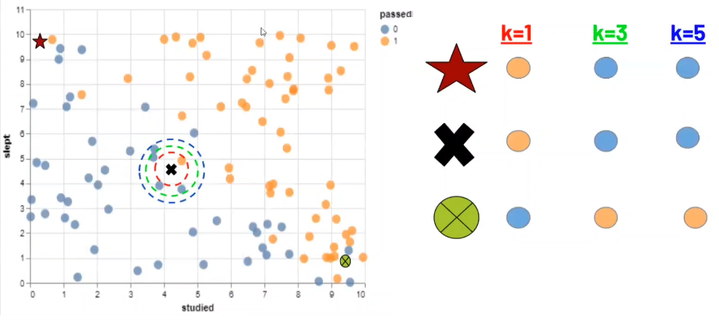

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

Cancer Prediction Model

In [3]:
df = pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


In [7]:
df['Cancer Present'].value_counts(normalize=True)

Cancer Present
1    0.5
0    0.5
Name: proportion, dtype: float64

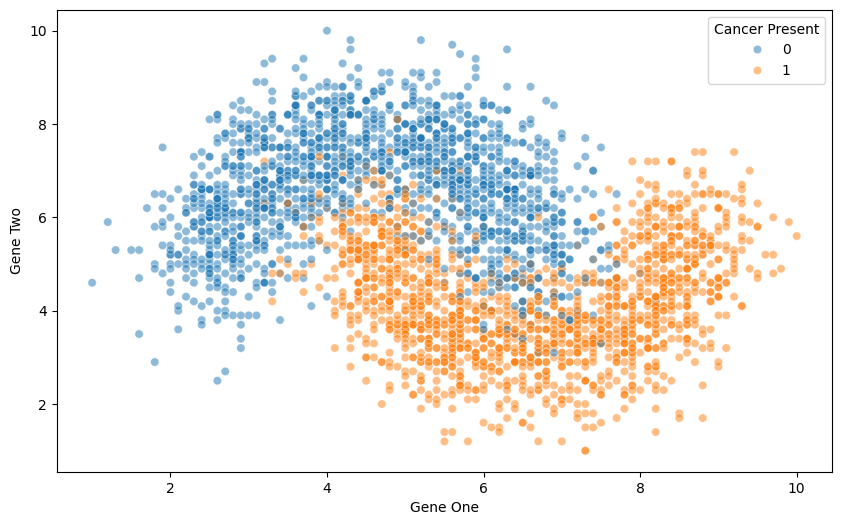

In [10]:
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present', data=df, alpha = 0.5);

In [8]:
df[df.duplicated()]

,Gene One,Gene Two,Cancer Present
38,5.0,5.3,0
69,6.3,7.7,0
160,4.4,5.1,1
163,5.7,7.2,0
193,6.3,6.6,0
...,...,...,...
2985,4.2,6.4,0
2987,6.4,5.5,0
2988,9.0,4.7,1
2992,2.8,7.1,0
